<a href="https://colab.research.google.com/github/huskeypm/tutorials/blob/master/che580/class_notes/numpy_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


Make a noisy signal

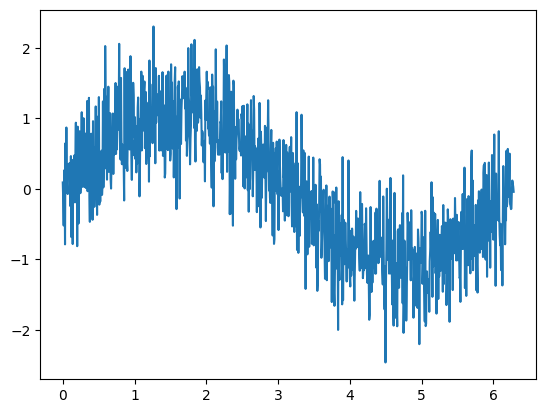

In [ ]:
n = 1000
scale = 0.5
r = scale * np.random.randn(n)

ampFactor = 1.1
x = np.linspace(0,2*np.pi,n)
y = ampFactor * np.sin(x) + r

plt.plot(x,y)
plt.show()


Now smooth it so we can see the trends better

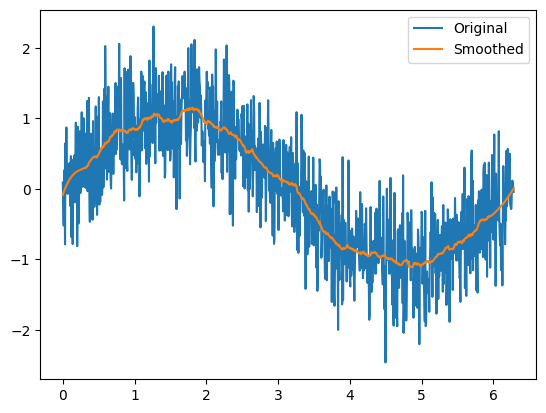

In [ ]:
# prompt: smooth array

from scipy.signal import savgol_filter

y_smoothed = savgol_filter(y, window_length=101, polyorder=3)

plt.plot(x, y, label='Original')
plt.plot(x, y_smoothed, label='Smoothed')
plt.legend()
plt.show()

Normalize the data

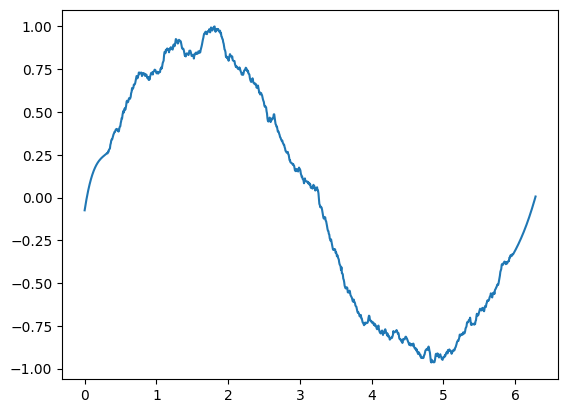

In [ ]:
y_normed = y_smoothed / np.max(y_smoothed)
plt.plot(x, y_normed)
plt.show()

How about numerical integration?: let's compute the cumulative sum.

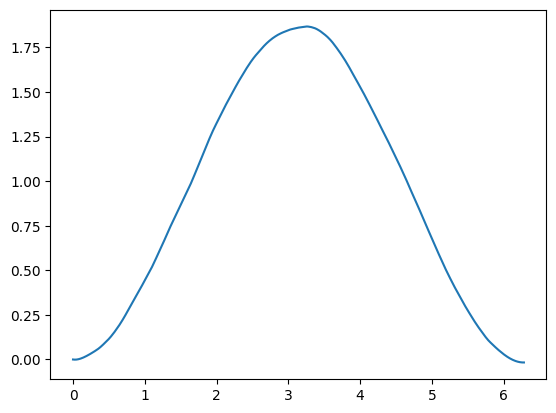

Manual: The cumulative sum is  -0.017153233414685855
Numpy : The cumulative sum is  -0.017153233414685855


In [ ]:
cumulative_sum = 0
deltaX = x[1] - x[0]
cumulative_sums = []
for val in y_normed:
    cumulative_sum += val * deltaX
    cumulative_sums.append(cumulative_sum)

plt.plot(x, cumulative_sums)
plt.show()
print("Manual: The cumulative sum is ",cumulative_sums[-1])

# using numpy instead of a loop we have
cumulative_sum = np.cumsum(y_normed * deltaX)
print("Numpy : The cumulative sum is ",cumulative_sum[-1])

